### Q3. Empirical Predator-Prey models such as Lotka-Volterra are commonly used to model such phenomenon. Consider the model x ̇ = (b − py)x and y ̇ = (rx − d)y. Use the data to fit values of b, p, r and d.

#### Load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/table.csv')
df = df.set_index(['year'])
df.head()

,hare,lynx
year,,
1845,20,32
1847,20,50
1849,52,12
1851,83,10
1853,64,13


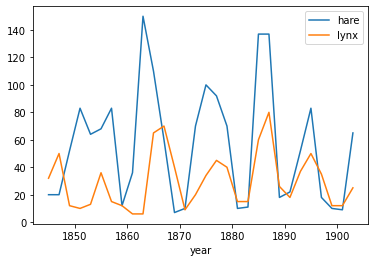

In [3]:
df.plot()

In [4]:
years = df.index.values
x1    = df['hare'].values
x2    = df['lynx'].values

In [5]:
x1s = x1[1:-1]
x2s = x2[1:-1]

In [6]:
n = len(years)

In [7]:
x1dots = []
x2dots = []

for j in range(1,n-1):
    x1dot = (x1[j+1] - x1[j-1]) / (2) 
    x2dot = (x2[j+1] - x2[j-1]) / (2)
    
    x1dots.append(x1dot)
    x2dots.append(x2dot)

In [8]:
A = [x1s, 
     x2s, 
     x1s*x2s,
     x1s**2,
     x2s**2,
     x1s**3,
     x2s**3,
     (x1s**2) * x2s,
     (x2s**2) * x1s]

In [9]:
# A = [x1s, 
#      x2s, 
#      x1s*x2s]

In [10]:
A = np.array(A)
x1dots = np.array(x1dots)
x2dots = np.array(x2dots)

In [11]:
x = np.arange(len(A))

<BarContainer object of 9 artists>

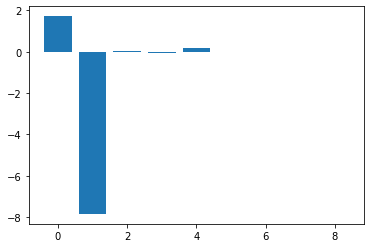

In [12]:
clf1 = linear_model.Lasso(alpha=0.001)

clf1.fit(A.T, x1dots)
plt.bar(x, clf1.coef_)

<BarContainer object of 9 artists>

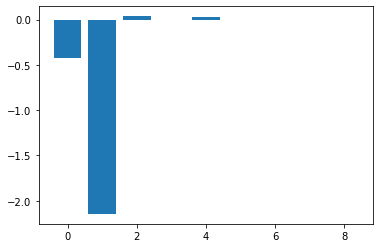

In [13]:
clf2 = linear_model.Lasso(alpha=0.001)

clf2.fit(A.T, x2dots)
plt.bar(x, clf2.coef_)

In [14]:
b = abs(clf1.coef_[0])
p = abs(clf1.coef_[2])
d = abs(clf2.coef_[1])
r = abs(clf2.coef_[2])

(b, p, d, r)

(1.7145680059692934,
 0.03541717253641244,
 2.1452972491999183,
 0.03712697314368552)

In [15]:
def lotkavolterra(t, x0, b, p, d, r):
    x, y = x0
    return [b*x - p*x*y, -d*y + r*x*y ]

In [16]:
t_range = [0, len(years)]
x0 = (x1[0], x2[0])
sol = solve_ivp(lotkavolterra, t_range, x0, args=(b, p, d, r), dense_output=True)

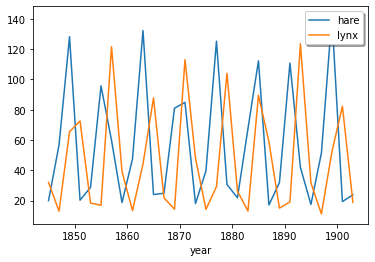

In [17]:
t = np.arange(0, len(years), 1)
z = sol.sol(t)
t = np.arange(years[0], years[-1]+1, 2)

plt.plot(t, z.T)
plt.xlabel('year')
plt.legend(['hare', 'lynx'], shadow=True)
plt.show()

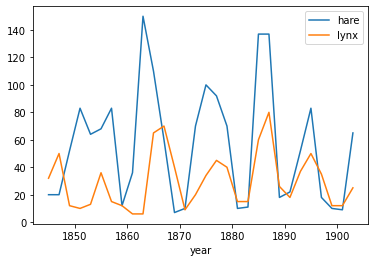

In [18]:
df.plot()

# Question
Should we just play with values for b, p, d, r to find a fit that seems to match the data? Or should we be finding a model through sparse regression, as outlined above?  

If we should approach the question, as demonstrated above, should the matrix A include non-linear terms? If I build the matrix with: 

In [19]:
# A = [x1s, 
#      x2s, 
#      x1s*x2s]

Instead of 

In [20]:
# A = [x1s, 
#      x2s, 
#      x1s*x2s,
#      x1s**2,
#      x2s**2,
#      x1s**3,
#      x2s**3,
#      (x1s**2) * x2s,
#      (x2s**2) * x1s]

I don't seem to get sensible results...

Or should we simply be empirically testing (playing with) coefficients until we find a good fit, and relegate evaluating matrix A until Q4 **Find the best fit nonlinear, dynamical systems model to the data using sparse regression.**

Regarding Q4, if we build a matrix with nonlinear terms, should these also be included in our final lotkavolterra() function, or should the function remain in the form of x ̇ = (b − py)x and y ̇ = (rx − d)y?